In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import shutil
def count_images_in_directory(directory):
    # Count the number of images in a directory
    return sum([len(files) for _, _, files in os.walk(directory)])

def prepare_full_dataset_for_flow(parent_dir, validation_percent):
    train_dir = os.path.join(parent_dir, 'train')
    validation_dir = os.path.join(parent_dir, 'validation')
    test_dir = os.path.join(parent_dir, 'test')
    subfolders = ['1', '0']

    # Calculate the number of images in each class for training
    nb_train_samples = {subfolder: count_images_in_directory(os.path.join(train_dir, subfolder)) for subfolder in subfolders}

    # Calculate the total number of training samples
    total_train_samples = sum(nb_train_samples.values())

    # Calculate the number of images in each class for testing
    nb_test_samples = {subfolder: count_images_in_directory(os.path.join(test_dir, subfolder)) for subfolder in subfolders}

    # Calculate the total number of test samples
    total_test_samples = sum(nb_test_samples.values())

    # Calculate the number of images in each class for validation
    nb_validation_samples = {subfolder: int(count * validation_percent) for subfolder, count in nb_train_samples.items()}

    # Calculate the total number of validation samples
    total_validation_samples = sum(nb_validation_samples.values())

    print('Number of training samples in each class:', nb_train_samples)
    print('Total number of training samples:', total_train_samples)

    print('Number of test samples in each class:', nb_test_samples)
    print('Total number of test samples:', total_test_samples)

    print('Number of validation samples in each class:', nb_validation_samples)
    print('Total number of validation samples:', total_validation_samples)

    return nb_train_samples, nb_validation_samples, nb_test_samples

def copy_images_to_validation(parent_dir, validation_percent):
    # Create the 'validation' directory in the parent folder if it doesn't exist
    validation_dir = os.path.join(parent_dir, 'validation')
    if not os.path.exists(validation_dir):
        os.mkdir(validation_dir)

    # List subfolders '1' and '0' in the 'train' directory
    train_dir = os.path.join(parent_dir, 'train')
    subfolders = ['1', '0']

    # Calculate the number of training and validation samples
    nb_train_samples, nb_validation_samples, nb_test_samples = prepare_full_dataset_for_flow(parent_dir, validation_percent)

    # Iterate over each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(validation_dir, subfolder)
        if not os.path.exists(subfolder_path):
            os.mkdir(subfolder_path)  # Create subfolder in validation directory if it doesn't exist

        train_subfolder_path = os.path.join(train_dir, subfolder)
        if not os.path.exists(train_subfolder_path):
            print(f"Subfolder '{subfolder}' not found in '{train_dir}'. Please check your directory structure.")
            continue

        # List all files in the subfolder
        files = os.listdir(train_subfolder_path)

        # Calculate the number of images to copy based on the validation percentage
        num_images_to_copy = nb_validation_samples[subfolder]

        # Randomly select 'num_images_to_copy' images from the subfolder
        selected_files = random.sample(files, num_images_to_copy)

        # Copy selected images to the corresponding subfolder in the 'validation' directory
        for file in selected_files:
            src_path = os.path.join(train_subfolder_path, file)
            dest_path = os.path.join(subfolder_path, file)
            shutil.copy2(src_path, dest_path)

    print(f'{validation_percent * 100}% of images copied to {validation_dir}')




parent_dir = '/content/drive/MyDrive/Embryo_dataset'  # Replace with the actual path to the parent folder
train_dir = '/content/drive/MyDrive/Embryo_dataset/train'
validation_dir = '/content/drive/MyDrive/Embryo_dataset/validation'
validation_percent = 0.2  # 20% of images from each class will be copied to the validation set
test_dir = '/content/drive/MyDrive/Embryo_dataset/test'
copy_images_to_validation(parent_dir, validation_percent)

Number of training samples in each class: {'1': 99, '0': 573}
Total number of training samples: 672
Number of test samples in each class: {'1': 25, '0': 143}
Total number of test samples: 168
Number of validation samples in each class: {'1': 19, '0': 114}
Total number of validation samples: 133
20.0% of images copied to /content/drive/MyDrive/Embryo_dataset/validation


Found 672 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
17225924/17225924 [==============================] - 1s 0us/step
Found 672 images belonging to 2 classes.
21/21 [==============================] - 85s 4s/step
Found 488 images belonging to 2 classes.
15/15 [==============================] - 48s 3s/step
Found 168 images belonging to 2 classes.
5/5 [==============================] - 18s 4s/step
Epoch 1/15
21/21 [==============================] - ETA: 0s - loss: 6.4970 - accuracy: 0.7827

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 23s 1s/step - loss: 6.4970 - accuracy: 0.7827 - val_loss: 1.4748 - val_accuracy: 0.8562
Epoch 2/15
21/21 [==============================] - 13s 639ms/step - loss: 4.4392 - accuracy: 0.7976 - val_loss: 0.7966 - val_accuracy: 0.8562
Epoch 3/15
21/21 [==============================] - 13s 624ms/step - loss: 2.3060 - accuracy: 0.8244 - val_loss: 0.6859 - val_accuracy: 0.8771
Epoch 4/15
21/21 [==============================] - 13s 612ms/step - loss: 1.3258 - accuracy: 0.8616 - val_loss: 0.4976 - val_accuracy: 0.9021
Epoch 5/15
21/21 [==============================] - 12s 552ms/step - loss: 0.7969 - accuracy: 0.8824 - val_loss: 0.4317 - val_accuracy: 0.9021
Epoch 6/15
21/21 [==============================] - 12s 582ms/step - loss: 0.5795 - accuracy: 0.8899 - val_loss: 0.3894 - val_accuracy: 0.9000
Epoch 7/15
21/21 [==============================] - 12s 588ms/step - loss: 0.4915 - accuracy: 0.9062 - val_loss: 0.3348 - val_accuracy: 0.9042
Epoch 8/15
21

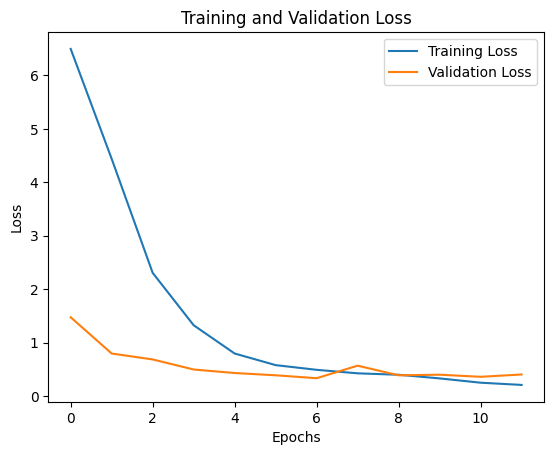

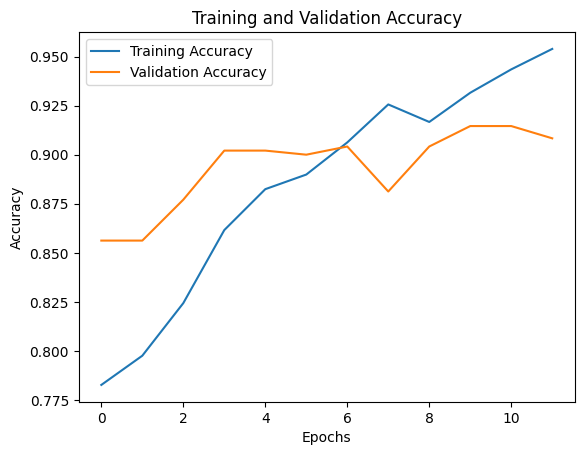

5/5 [==============================] - 0s 45ms/step
Image 1: Predicted Label: 0, Probability: 0.9999881386756897
Image 2: Predicted Label: 0, Probability: 0.9999999403953552
Image 3: Predicted Label: 0, Probability: 0.9999998211860657
Image 4: Predicted Label: 0, Probability: 0.9999999403953552
Image 5: Predicted Label: 0, Probability: 0.9999999403953552
Image 6: Predicted Label: 0, Probability: 0.9999999403953552
Image 7: Predicted Label: 0, Probability: 0.9999955296516418
Image 8: Predicted Label: 0, Probability: 0.9999374747276306
Image 9: Predicted Label: 0, Probability: 0.9999969601631165
Image 10: Predicted Label: 0, Probability: 0.9999167323112488
Image 11: Predicted Label: 0, Probability: 0.9999999403953552
Image 12: Predicted Label: 0, Probability: 0.9999999403953552
Image 13: Predicted Label: 0, Probability: 0.9999999403953552
Image 14: Predicted Label: 0, Probability: 0.9999999403953552
Image 15: Predicted Label: 0, Probability: 0.9999999403953552
Image 16: Predicted Label: 

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.utils import to_categorical
from keras.optimizers import Adam
import os



# Set constants
img_width, img_height = 224, 224
epochs = 15
batch_size = 32


#DATA PREPARATION

# Define directories
parent_dir = '/content/drive/MyDrive/Embryo_dataset'
train_dir = os.path.join(parent_dir, 'train')
validation_dir = os.path.join(parent_dir, 'validation')
test_dir = os.path.join(parent_dir, 'test')
bottleneck_dir = os.path.join(parent_dir, 'bottleneck_features')

#PREPROCESSING
#DATA AUGUMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
nb_train_samples = len(train_generator.filenames)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
nb_validation_samples = len(validation_generator.filenames)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
nb_test_samples = len(test_generator.filenames)

# Create bottleneck features directory if it doesn't exist
if not os.path.exists(bottleneck_dir):
    os.makedirs(bottleneck_dir)

# LOAD PRETRAINED MODEL
# Load MobileNet model without top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

#SAVE BOTTLENECK FEATURES
def save_bottleneck_features(model, preprocess, datagen, directory, bottleneck_dir, sample_count):
    generator = datagen.flow_from_directory(
        directory=directory,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False
    )
    features = model.predict(generator, steps=sample_count // batch_size)
    features_path = os.path.join(bottleneck_dir, os.path.basename(directory) + '_features.npy')
    np.save(features_path, features)

# SAVE BOTTLENECK FEATURES FOR TRAIN, VALIDATION, TEST SETS
save_bottleneck_features(base_model, preprocess_input, train_datagen, train_dir, bottleneck_dir, nb_train_samples)
save_bottleneck_features(base_model, preprocess_input, validation_datagen, validation_dir, bottleneck_dir, nb_validation_samples)
save_bottleneck_features(base_model, preprocess_input, test_datagen, test_dir, bottleneck_dir, nb_test_samples)


#LOAD BOTTLENECK FEATURES AND LABELS
X_train = np.load(os.path.join(bottleneck_dir, 'train_features.npy'))
y_train = to_categorical(train_generator.classes[:len(X_train)])

X_validation = np.load(os.path.join(bottleneck_dir, 'validation_features.npy'))
y_validation = to_categorical(validation_generator.classes[:len(X_validation)])

X_test = np.load(os.path.join(bottleneck_dir, 'test_features.npy'))

# BUILD TOP CLASSIFICATION LAYERS
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))  # Additional dense layer
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  # Additional dense layer
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

# COMPILE THE MODEL
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# DDEFINE CALLBACKS
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2, mode='auto')
save_weights = ModelCheckpoint('/content/drive/MyDrive/Embryo_dataset/bottleneck_features/Mobilenet_model.h5', monitor='val_loss', save_best_only=True)

#TRAIN THE MODEL
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_validation, y_validation),
                    callbacks=[save_weights, early_stopping])


#VISUALIZATION
# Assuming 'history' is the variable holding the training history
# You can print the keys to see what information is available
import matplotlib.pyplot as plt

# Print history keys
print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')  # Corrected
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#MODEL EVALUATION/ANALYSIS
# Predict probabilities for test data
test_probabilities = model.predict(X_test)

# Example of how to use the predicted probabilities:
for i, prob in enumerate(test_probabilities):
    predicted_label = np.argmax(prob)
    print(f"Image {i + 1}: Predicted Label: {predicted_label}, Probability: {prob[predicted_label]}")


In [4]:
#MODEL EVALUATION/ANALYSIS
# Load true labels for the test set
y_test = to_categorical(test_generator.classes[:len(X_test)])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Test Loss: 0.5056877732276917
Test Accuracy: 0.8999999761581421


In [5]:
from sklearn.metrics import classification_report

# Model evaluation and analysis
test_probabilities = model.predict(X_test)

# Get the filenames from the test generator
filenames = test_generator.filenames

# Extract true labels from filenames
true_labels = []
for filename in filenames:
    label = os.path.basename(os.path.dirname(filename))
    true_labels.append(int(label))

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_probabilities, axis=1)

# Generate classification report
report = classification_report(true_labels[:len(predicted_labels)], predicted_labels)

print("Classification Report:")
print(report)

# Truncate the true labels array to match the size of the predicted labels array
true_labels_truncated = true_labels[:len(predicted_labels)]

# Generate classification report
report = classification_report(true_labels_truncated, predicted_labels, output_dict=True)

# Extract individual metrics
classification_metrics = report

# Print the extracted metrics
print("Overall Precision:", classification_metrics['accuracy'])
print("Overall Recall:", classification_metrics['accuracy'])
print("Overall F1-score:", classification_metrics['accuracy'])
print("Support:", classification_metrics['macro avg']['support'])
print("Accuracy:", classification_metrics['accuracy'])
print("Macro avg Precision:", classification_metrics['macro avg']['precision'])
print("Macro avg Recall:", classification_metrics['macro avg']['recall'])
print("Macro avg F1-score:", classification_metrics['macro avg']['f1-score'])
print("Weighted avg Precision:", classification_metrics['weighted avg']['precision'])
print("Weighted avg Recall:", classification_metrics['weighted avg']['recall'])
print("Weighted avg F1-score:", classification_metrics['weighted avg']['f1-score'])



5/5 [==============================] - 0s 88ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       143
           1       0.57      0.24      0.33        17

    accuracy                           0.90       160
   macro avg       0.74      0.61      0.64       160
weighted avg       0.88      0.90      0.88       160

Overall Precision: 0.9
Overall Recall: 0.9
Overall F1-score: 0.9
Support: 160
Accuracy: 0.9
Macro avg Precision: 0.7432306255835668
Macro avg Recall: 0.6071575483340189
Macro avg F1-score: 0.6396396396396397
Weighted avg Precision: 0.8785247432306257
Weighted avg Recall: 0.9
Weighted avg F1-score: 0.8808558558558559


In [6]:
#SAVE THE RESULTS
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
import os

# Load the MobileNet model without top classification layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the trained model
model_path = '/content/drive/MyDrive/Embryo_dataset/bottleneck_features/Mobilenet_model.h5'
model = load_model(model_path)

# Define the path to the test folder
test_dir = '/content/drive/MyDrive/Embryo_dataset/test'

# Function to predict labels for images in a given directory
def predict_images_in_folder(folder_path):
    predictions = []
    true_labels = []
    probabilities_0 = []
    probabilities_1 = []
    image_ids = []

    subfolders = os.listdir(folder_path)
    for label in subfolders:
        subdir_path = os.path.join(folder_path, label)
        image_files = os.listdir(subdir_path)
        for image_file in image_files:
            image_path = os.path.join(subdir_path, image_file)
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            preprocessed_img = preprocess_input(img_array)
            bottleneck_features = base_model.predict(preprocessed_img)
            prediction = model.predict(bottleneck_features)

            predicted_label = np.argmax(prediction)
            true_label = int(label)
            predictions.append(predicted_label)
            true_labels.append(true_label)
            probabilities = prediction.squeeze() * 100  # Convert to percentage
            probabilities_0.append(probabilities[0])  # Probability for class '0'
            probabilities_1.append(probabilities[1])  # Probability for class '1'
            image_ids.append(image_file.split('.')[0])  # Extract image ID

    return image_ids, true_labels, predictions, probabilities_0, probabilities_1

# Predict labels, probabilities, and image IDs for images in each subfolder
image_ids, true_labels, predictions, probabilities_0, probabilities_1 = predict_images_in_folder(test_dir)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image_ID': image_ids,
    'True_Label': true_labels,
    'Prediction_Label': predictions,
    'Probability_Class_0': probabilities_0,
    'Probability_Class_1': probabilities_1
})

# Include only the samples where the predicted label matches the true label
correct_predictions_df = results_df[results_df['True_Label'] == results_df['Prediction_Label']]

# Save the results to a CSV file
results_csv_path = '/content/drive/MyDrive/Embryo_dataset/test_results.csv'
correct_predictions_df.to_csv(results_csv_path, index=False)

print("Results saved to:", results_csv_path)
print(probabilities_0)
print(probabilities_1)


1/1 [==============================] - 0s 29ms/step
Results saved to: /content/drive/MyDrive/Embryo_dataset/test_results.csv
[100.0, 18.179508, 92.20535, 99.99998, 49.90016, 14.477071, 100.0, 99.95552, 96.03315, 94.84417, 26.26203, 25.439491, 12.111927, 99.999985, 81.84876, 99.291, 99.89677, 45.95519, 96.405754, 99.873146, 61.193447, 0.7289554, 99.99969, 20.715649, 62.67611, 99.97274, 99.99981, 99.99996, 99.999985, 99.99303, 99.99871, 99.999146, 99.98246, 99.97774, 99.99156, 100.0, 99.946014, 99.999985, 99.999916, 99.58859, 99.978676, 99.92417, 99.99979, 99.8917, 99.99814, 99.81896, 99.99987, 99.99975, 99.999725, 99.999916, 100.0, 100.0, 99.999115, 99.996056, 99.881294, 100.0, 99.99998, 99.99966, 100.0, 17.085808, 98.21193, 99.999985, 99.99985, 99.57663, 99.99928, 99.99697, 99.967064, 99.999985, 100.0, 99.97508, 99.58254, 99.99991, 99.99947, 100.0, 99.99943, 99.997055, 99.9813, 99.999794, 99.99318, 99.99998, 99.99998, 100.0, 99.999725, 99.999985, 100.0, 99.99996, 99.99993, 100.0, 99.88

<Figure size 800x600 with 0 Axes>

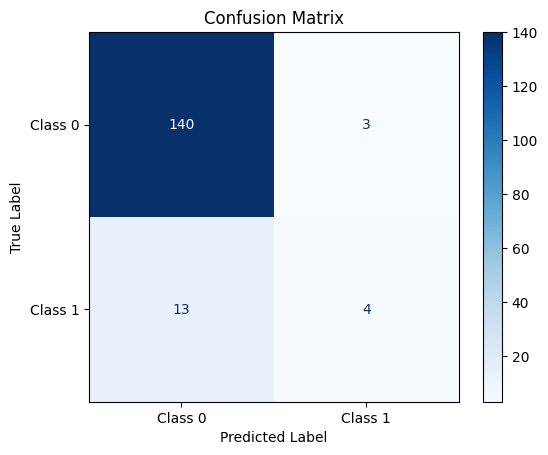

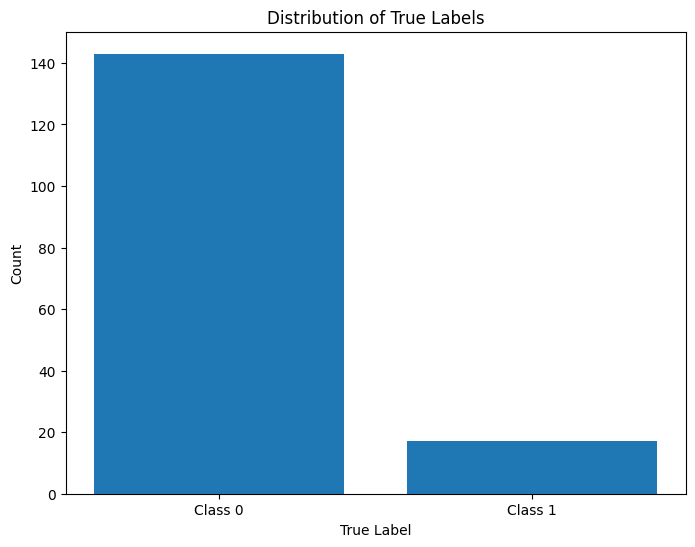

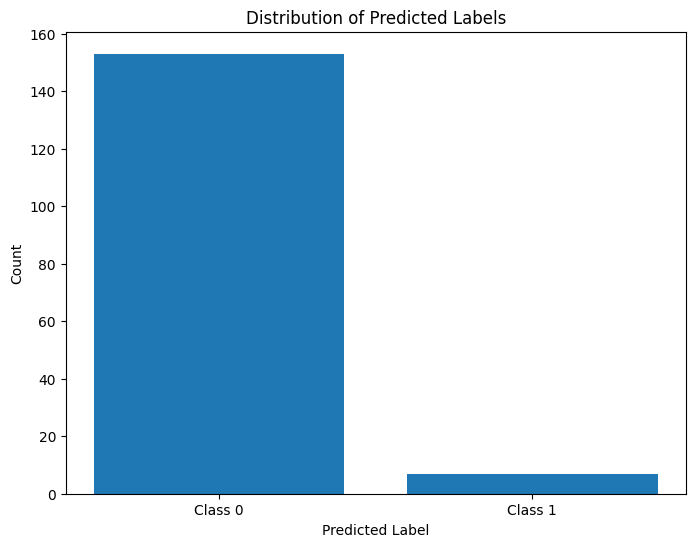

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(true_labels_truncated, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot distribution of true labels
plt.figure(figsize=(8, 6))
unique, counts = np.unique(true_labels_truncated, return_counts=True)
plt.bar(unique, counts, tick_label=['Class 0', 'Class 1'])
plt.title('Distribution of True Labels')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.show()

# Plot distribution of predicted labels
plt.figure(figsize=(8, 6))
unique, counts = np.unique(predicted_labels, return_counts=True)
plt.bar(['Class 0', 'Class 1'], counts)
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.show()

